# Snapshot from .vtp

In [12]:
import pathlib
import warnings

from cfdmod.use_cases.snapshot.camera import take_snapshot
from cfdmod.use_cases.snapshot.config import LabelsConfig, LegendConfig, ImageConfig, PartialProjectionConfig, SnapshotConfig
from cfdmod.use_cases.snapshot.process_image import process_image
from cfdmod.utils import create_folder_path

<div style="text-align: center"> edit: </div>

- define the paths

In [ ]:
files_path = pathlib.Path("./fixtures/tests/snapshot")
output_path = pathlib.Path("./output/images")
snapshot_config_path = files_path / "snapshot_params_example.yaml"
create_folder_path(output_path)

- wind_dirs: a list of strings that represents wind directions, used to create the path to each projection in each image
- images: configuration to generate images
  - name: name that represents the image
  - legend_config: configuration of the label in the image
  - projections: a set of key value pair of projections names and partial projection config (only the part thats differs in each projection)

In [22]:
wind_dirs = [angle for angle in range(0, 60, 30)]
images = [
    ImageConfig(
        name= f"{wind_dir:03}",
        legend_config = LegendConfig(label="cp_equivalent_mean", range=[-2.25, 1.5], n_divs=15),
        projections={
                "top_projection": PartialProjectionConfig(file_path=files_path / f"{wind_dir:03}.vtp", scalar="min", labels_config=LabelsConfig(spacing=25, padding=(5, 10))),
                "front_projection": PartialProjectionConfig(file_path=files_path / f"{wind_dir:03}.vtp", scalar=f"{'max' if wind_dir > 270 or wind_dir < 90 else 'min'}", labels_config=LabelsConfig(spacing=25, padding=(5, 10))),
                "back_projection": PartialProjectionConfig(file_path=files_path / f"{wind_dir:03}.vtp", scalar=f"{'max' if wind_dir > 90 and wind_dir < 270 else 'min'}", labels_config=LabelsConfig(spacing=25, padding=(5, 10))),
                "right_projection": PartialProjectionConfig(file_path=files_path / f"{wind_dir:03}.vtp", scalar=f"{'max' if wind_dir > 180 and wind_dir < 360 else 'min'}", labels_config=LabelsConfig(spacing=25, padding=(5, 10))),
                "left_projection": PartialProjectionConfig(file_path=files_path / f"{wind_dir:03}.vtp", scalar=f"{'max' if wind_dir > 0 and wind_dir < 180 else 'min'}", labels_config=LabelsConfig(spacing=25, padding=(5, 10))),
            },
        )
    for wind_dir in wind_dirs
]

<div style="text-align: center"> execute: </div>

- a base snapshot configuration is created using an YAML file. Each image configuration subscribes some parts, creating the final configuration for the image.
- For each image configuration, the snapshot base configuration will be modified according to the settings for the respective image.

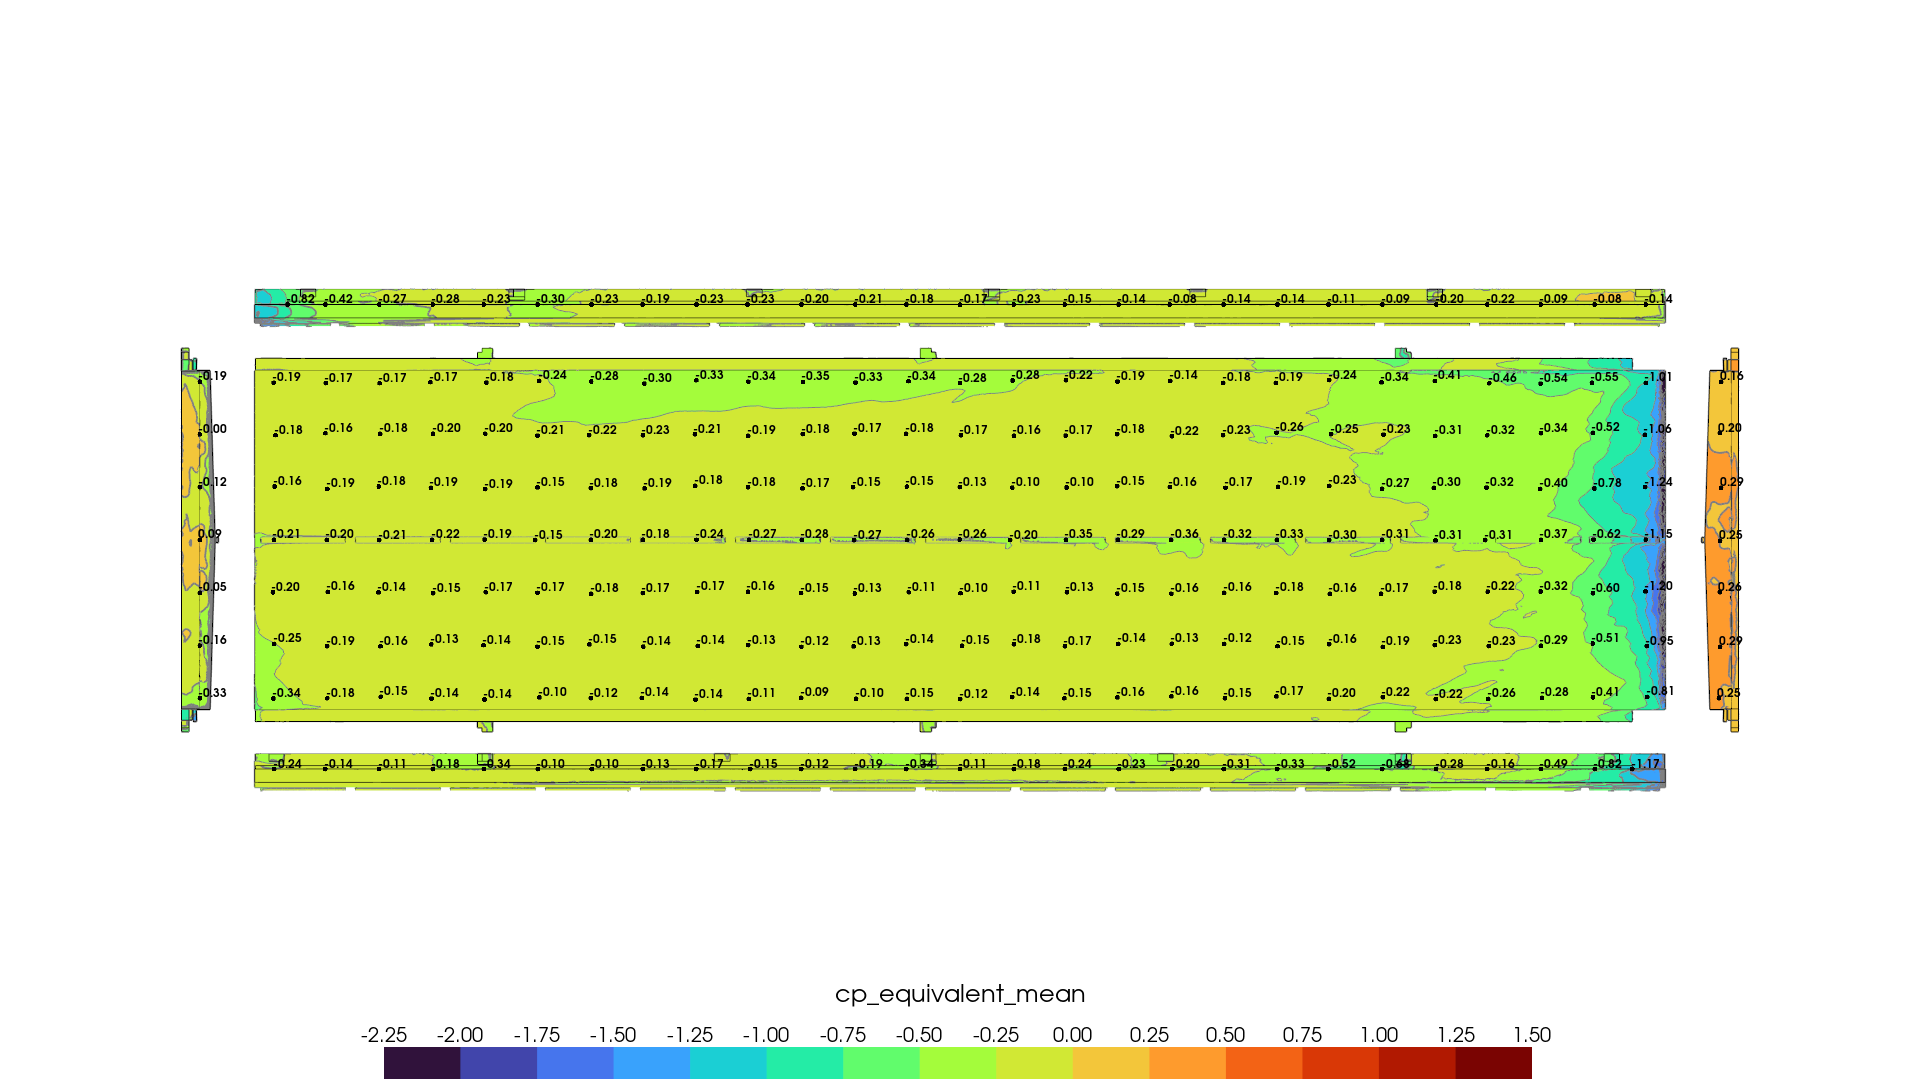

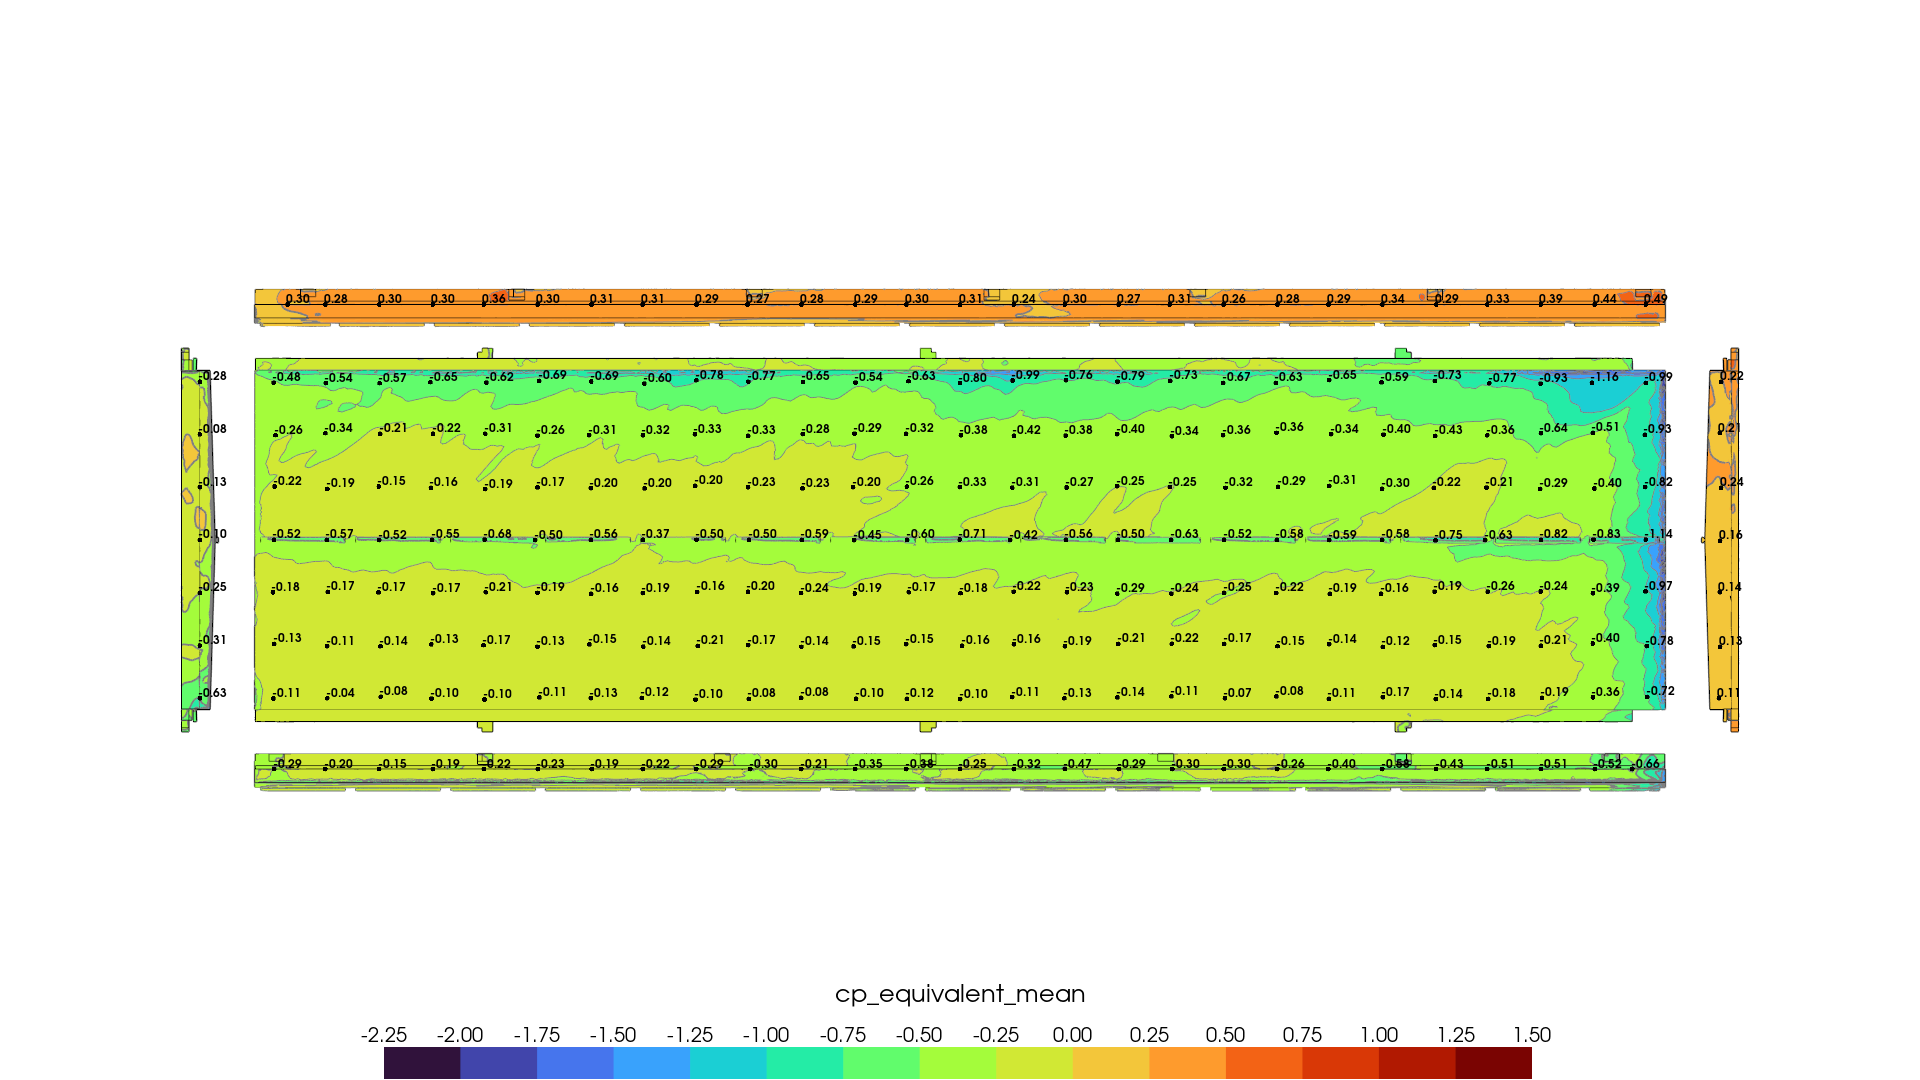

In [23]:
snapshot_config = SnapshotConfig.from_file(snapshot_config_path)

for image in images:
    for projection_key in image.projections:
        snapshot_config.name = output_path / image.name
        snapshot_config.projections[projection_key].file_path = image.projections[projection_key].file_path
        snapshot_config.projections[projection_key].scalar = image.projections[projection_key].scalar
        snapshot_config.projections[projection_key].labels_config = image.projections[projection_key].labels_config
        snapshot_config.legend_config = image.legend_config
        
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        take_snapshot(snapshot_config)
    # process_image(
    #     image_path=output_path / f"{image.name}.png",
    #     output_path=output_path / f"{image.name}.png",
    #     crop_cfg=snapshot_config.camera.crop,
    # )